# Classify Cancer Cells (whether the samples are Benign or Malignant) using Support Vector Machines

### Importing Required Libraries

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading Data from CSV File

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\Data Science\cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Data Visualization

<IPython.core.display.Javascript object>


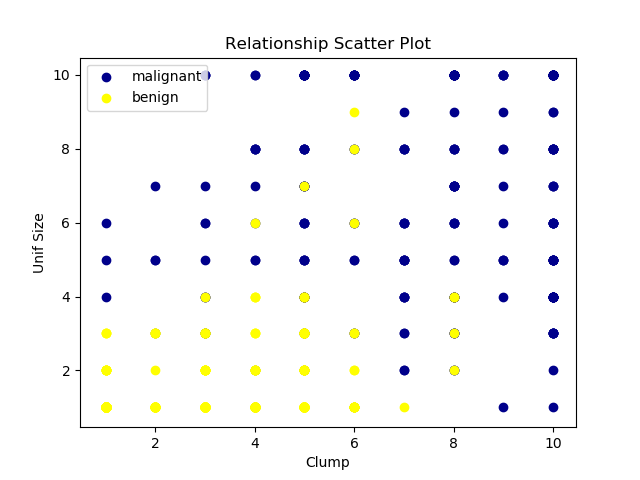

In [3]:
plt.figure()
mdf = df[df['Class'] == 4]
plt.scatter(mdf.Clump, mdf.UnifSize, color = 'DarkBlue', label = 'malignant')
bdf = df[df['Class'] == 2]
plt.scatter(bdf.Clump, bdf.UnifSize, color = 'Yellow', label = 'benign')
plt.xlabel('Clump')
plt.ylabel('Unif Size')
plt.title('Relationship Scatter Plot')
plt.legend(loc = 'upper left')

### Data Preprocessing

In [4]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')

### Splitting Data into Train and Test

In [5]:
from sklearn.model_selection import train_test_split
X = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

### SVM Modeling

In [6]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf', gamma = 'auto')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Model Accuracy

In [7]:
clf.score(X_test, y_test)

0.9562043795620438

### Predicting the Category of a new Cancer Cell

In [8]:
clf.predict([[6, 7, 2, 3, 3, 8, 3, 7, 1]])

array([4], dtype=int64)

### Evaluation Metrics

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
y_test_hat = clf.predict(X_test)
print(classification_report(y_test, y_test_hat))
print("Confusion Matrix : ")
print(confusion_matrix(y_test, y_test_hat))
print("Jaccard Index = ", jaccard_score(y_test, y_test_hat, average = 'weighted'))
print("F1 Score = ", f1_score(y_test, y_test_hat, average = 'weighted'))

              precision    recall  f1-score   support

           2       1.00      0.93      0.96        87
           4       0.89      1.00      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.95       137
weighted avg       0.96      0.96      0.96       137

Confusion Matrix : 
[[81  6]
 [ 0 50]]
Jaccard Index =  0.9171011470281543
F1 Score =  0.9566618136030063
